By Nitish Adhikari

Email id :nitishbuzzpro@gmail.com, +91-9650740295
    
Linkedin : https://www.linkedin.com/in/nitish-adhikari-6b2350248

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
comments=pd.read_csv('UScomments.csv',error_bad_lines=False)

In [3]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
#find out missing values in data
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
##drop missing values as we have very few & update dataframe
comments.dropna(inplace=True)

In [6]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# perform Sentiment Analysis
    
    In short , Sentiment analysis is all about analyszing sentiments of Users

In [7]:
# sentiment analysis using TextBlob which is a NLP library built on top of NLTK )..

In [ ]:
!pip install textblob

In [9]:
from textblob import TextBlob

In [10]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [11]:
df=comments[0:1000]

In [12]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [13]:
print(polarity[0:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573, 0.0, 0.2, -0.023333333333333352, 0.5, 0.0, 0.8, -0.2916666666666667, 0.0, 0.25, -0.8, 0.0, 0.0, 0.65, 0.0, 0.375, 0.0, 0.0, 0.5, -0.04999999999999999, 0.34448051948051944, 0.5, 0.6, 0.0, 0.0, -0.30625, 0.28828125, -0.36458333333333337, 0.5, 0.012499999999999997, 0.11904761904761905, 0.16666666666666666, 0.0, -0.4, -0.125, -0.07142857142857142, 0.40727272727272723, 0.0, 0.35, 0.0, -0.03415584415584416]


In [14]:
comments.shape

(691375, 4)

In [15]:
comments.head(3)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   

  replies  
0       0  
1       0  
2       0

In [16]:
comments['polarity']=polarity

In [17]:
comments.head(12)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000

 Wordcloud Analysis of data

In [1]:
### Lets perform EDA for the Positve sentences

In [19]:
comments_positive=comments[comments['polarity']==1]

In [20]:
comments_negative=comments[comments['polarity']==-1]

In [21]:
comments_negative.head(2)

video_id                                       comment_text likes  \
512  8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562  8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   

    replies  polarity  
512       0      -1.0  
562       0      -1.0

In [22]:
!pip install wordcloud

In [23]:
from wordcloud import WordCloud , STOPWORDS

In [24]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [25]:
total_comments=' '.join(comments_negative['comment_text'])

In [26]:
total_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

(-0.5, 399.5, 199.5, -0.5)

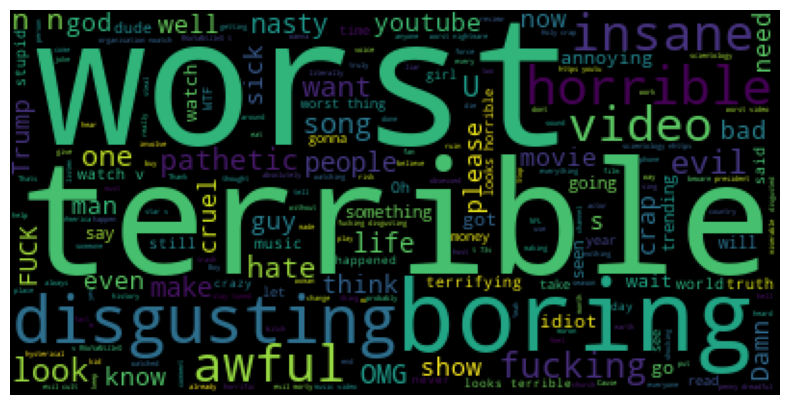

In [27]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [28]:
# Conclusion-->> Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc

In [29]:
# perform EDA for the Negative sentences

In [30]:
total_comments2=' '.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

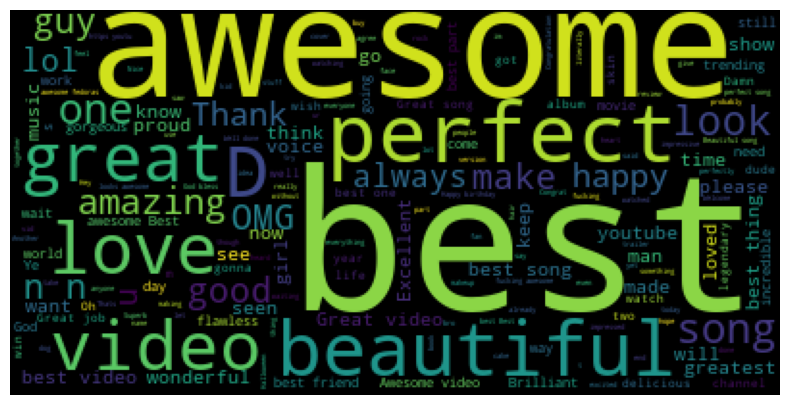

In [31]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## 3. Perform Emoji's Analysis

In [32]:
!pip install emoji

In [33]:
import emoji

In [34]:
comments.head(14)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000

In [35]:
#list of emojis in all comments
emoji_list=[] 
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [36]:
len(emoji_list) #total items in emoji list

294549

In [37]:
len(pd.Series(emoji_list).unique()) #unique items in emoji list

1098

In [38]:
from collections import Counter

In [39]:
Counter(emoji_list) #generate dictionary of count of each emoji

Counter({'‼': 211,
         '😉': 998,
         '😭': 8398,
         '👍': 5476,
         '🏻': 3438,
         '❤': 31119,
         '😍': 33453,
         '💋': 968,
         '💙': 2831,
         '👈': 126,
         '😂': 36987,
         '🔥': 8694,
         '👻': 268,
         '💎': 316,
         '😆': 1149,
         '😁': 2220,
         '😒': 629,
         '👏': 5719,
         '😊': 3596,
         '👌': 3112,
         '🤔': 1592,
         '💔': 617,
         '👎': 673,
         '🍎': 49,
         '😤': 378,
         '😢': 2672,
         '👫': 33,
         '💘': 702,
         '😻': 1409,
         '💖': 5359,
         '🌟': 549,
         '😮': 1232,
         '👇': 151,
         '😳': 398,
         '😠': 599,
         '😴': 187,
         '😝': 413,
         '™': 46,
         '☺': 1180,
         '😔': 545,
         '😩': 1472,
         '😡': 478,
         '🙏': 1818,
         '😄': 1496,
         '😬': 3381,
         '☹': 173,
         '🤷': 334,
         '🤣': 2279,
         '😃': 1235,
         '🏽': 1593,
         '🍏': 56,
      

In [40]:
Counter(emoji_list).most_common(10) #10 most common emojis

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [41]:
#accesing 1st element of list
Counter(emoji_list).most_common(10)[0]

('😂', 36987)

In [42]:
#accesing 1st item of 1st element of list
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [43]:
#Extracting all the emoji from 10 most comman in a list
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [44]:
#Extracting frequenciesof emoji from 10 most comman in a list
freqs = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [45]:
!pip install plotly

In [46]:
import plotly.graph_objects as go
from plotly.offline import iplot

In [47]:
trace = go.Bar(x=emojis,y=freqs)
trace

Bar({
    'x': [😂, 😍, ❤, 🔥, 😭, 👏, 😘, 👍, 💖, 💕],
    'y': [36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]
})

In [48]:
iplot([trace])

# Collect Entire Data of Youtube

In [49]:
import os

In [50]:
path = r'E:\Nitish\pd\PJT\Sentiment Analysis\additional_data'

In [51]:
files=os.listdir(path) #list of files in path
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

extract list of only .csv files

In [52]:
#extract list of only .csv files
files_csv=[files[i] for i in range(0,len(files),2)]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [53]:
#Extract country name from file name
files_csv[0][0:2]

'CA'

In [ ]:
#Creating a full dataframe using all the CSV files in the path
full_df = pd.DataFrame()

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    
    current_df['country'] = file[0:2]
    full_df = pd.concat([full_df,current_df])

In [55]:
#Created full dataframe
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA  
3  I know it's been a while since we did this sho...      CA  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA

In [56]:
full_df.shape

(375942, 17)

# Analysing the most liked Category

In [57]:
cat=pd.read_csv('category_file.txt', sep=':')
cat.head()

Category_id      Category_name
1                Film & Animation
2                Autos & Vehicles
10                          Music
15                 Pets & Animals
17                         Sports

In [58]:
cat.reset_index(inplace=True)

In [59]:
cat.columns =['Category_id', 'Category_name']

In [60]:
cat.set_index('Category_id',inplace=True)

In [61]:
cat

Category_name
Category_id                        
1                  Film & Animation
2                  Autos & Vehicles
10                            Music
15                   Pets & Animals
17                           Sports
18                     Short Movies
19                  Travel & Events
20                           Gaming
21                    Videoblogging
22                   People & Blogs
23                           Comedy
24                    Entertainment
25                  News & Politics
26                    Howto & Style
27                        Education
28             Science & Technology
29            Nonprofits & Activism
30                           Movies
31                  Anime/Animation
32                 Action/Adventure
33                         Classics
34                           Comedy
35                      Documentary
36                            Drama
37                           Family
38                          Foreign
39                           Horror
40                   Sci-Fi/Fantasy
41                         Thriller
42                           Shorts
43                            Shows
44             Trailers

In [62]:
dct=cat.to_dict() #converting dataframe to dictonary
dct

{'Category_name': {1: ' Film & Animation',
  2: ' Autos & Vehicles',
  10: ' Music',
  15: ' Pets & Animals',
  17: ' Sports',
  18: ' Short Movies',
  19: ' Travel & Events',
  20: ' Gaming',
  21: ' Videoblogging',
  22: ' People & Blogs',
  23: ' Comedy',
  24: ' Entertainment',
  25: ' News & Politics',
  26: ' Howto & Style',
  27: ' Education',
  28: ' Science & Technology',
  29: ' Nonprofits & Activism',
  30: ' Movies',
  31: ' Anime/Animation',
  32: ' Action/Adventure',
  33: ' Classics',
  34: ' Comedy',
  35: ' Documentary',
  36: ' Drama',
  37: ' Family',
  38: ' Foreign',
  39: ' Horror',
  40: ' Sci-Fi/Fantasy',
  41: ' Thriller',
  42: ' Shorts',
  43: ' Shows',
  44: ' Trailers            '}}

In [63]:
dct['Category_name'] #Access category_name

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [64]:
full_df['category_name']=full_df['category_id'].map(dct['Category_name'])

In [65]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country   category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA           Music  
1  STill got a lot of packages. Probably will las...      CA          Comedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA          Comedy  
3  I know it's been a while since we did this sho...      CA   Entertainment  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA           Music

### Analyse which category has maximum likes 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

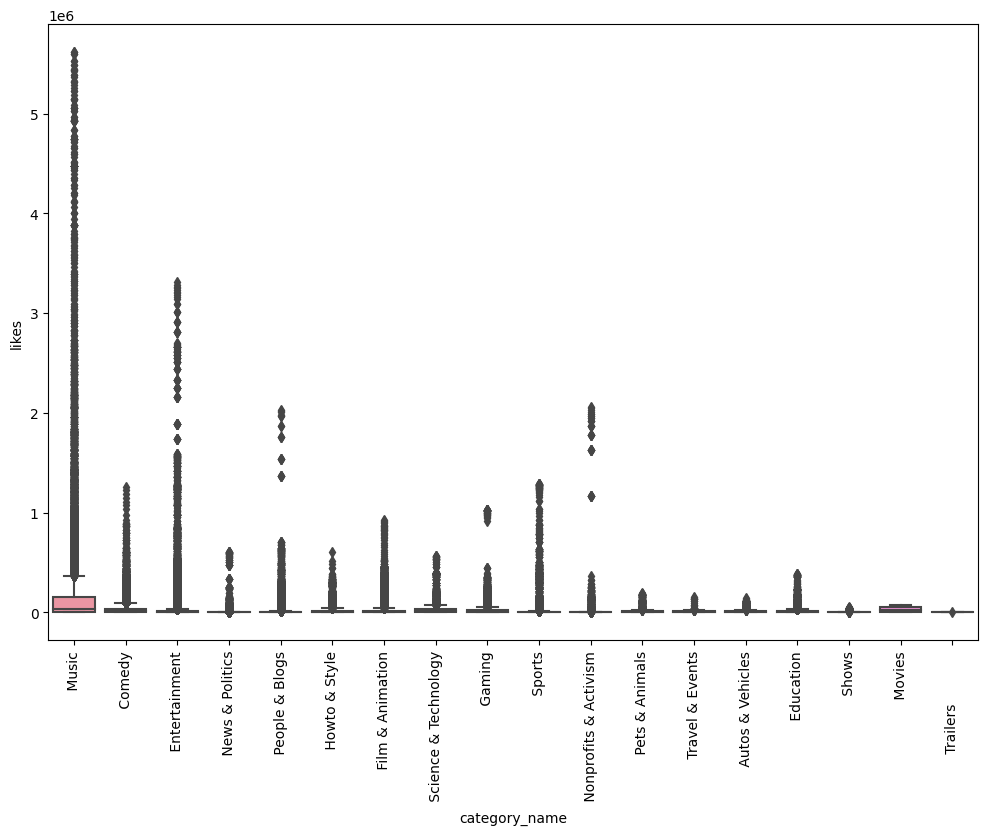

In [66]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')

# Analye whether audience is engaged or not

In [67]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [68]:
#Features that inciates the engagement of audience
full_df[['views', 'likes', 'dislikes', 'comment_count']].head()

views    likes  dislikes  comment_count
0  17158579   787425     43420         125882
1   1014651   127794      1688          13030
2   3191434   146035      5339           8181
3   2095828   132239      1989          17518
4  33523622  1634130     21082          85067

In [69]:
#Adding like rate, dislike rate, comment_count_rate to our dataframe
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

<AxesSubplot:xlabel='views', ylabel='likes'>

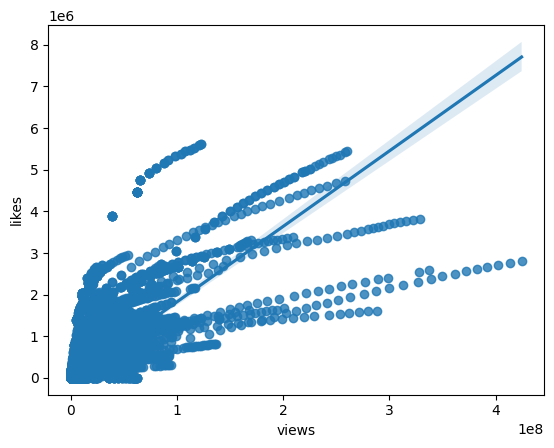

In [70]:
#regression plot for likes vs views
sns.regplot(data=full_df, x='views', y='likes')

<AxesSubplot:>

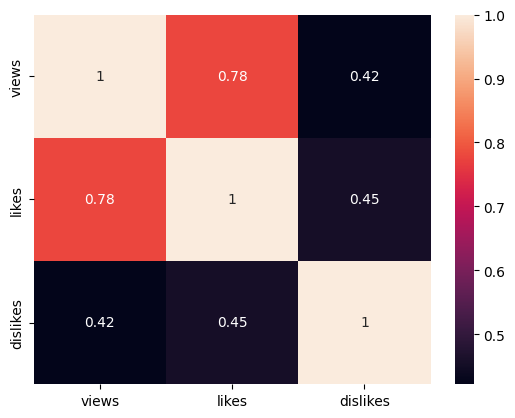

In [71]:
#Checking correlation between 'views', 'likes', 'dislikes'
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)

## Which channel has largest number of trending videos

In [72]:
#Channels with highest video_id
full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False)

channel_title
The Late Show with Stephen Colbert    984
WWE                                   804
Late Night with Seth Meyers           773
VikatanTV                             763
TheEllenShow                          743
                                     ... 
LIGHTS - 001 jrny                       1
bangtanist                              1
LIGAMX Femenil                          1
LIGA COLOMBIANA OFICIAL                 1
Pavel Sidorik TV                        1
Name: video_id, Length: 37824, dtype: int64

In [73]:
# Making a dataframe and renaming video_id to total videos
cdf=full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})
cdf

channel_title  total_videos
0      The Late Show with Stephen Colbert           984
1                                     WWE           804
2             Late Night with Seth Meyers           773
3                               VikatanTV           763
4                            TheEllenShow           743
...                                   ...           ...
37819                   LIGHTS - 001 jrny             1
37820                          bangtanist             1
37821                      LIGAMX Femenil             1
37822             LIGA COLOMBIANA OFICIAL             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [74]:
import plotly.express as px

In [75]:
px.bar(data_frame=cdf[0:20],x='channel_title',y='total_videos')

## Analyse if punctuations in title and tags have any relation with views,likes,dislikes,comments

In [76]:
import string

In [77]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [79]:
#Testing the function
punc_count('The Late Show & with Stephen Colbert')

1

In [80]:
#Making a sample dataframe to speed up the comutation time
sample = full_df[0:10000]

In [ ]:
#Creating a feature of punctuation count on sample dataframe
sample['count_punc']=sample['title'].apply(punc_count)
sample['count_punc']

In [82]:
sample.head(2) #coun_punc column added to sample dataframe

video_id trending_date                                        title  \
0  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   

   dislikes  ...  comments_disabled ratings_disabled  video_error_or_removed  \
0     43420  ...              False            False                   False   
1      1688  ...              False            False                   False   

                                         description  country category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...       CA         Music   
1  STill got a lot of packages. Probably will las...       CA        Comedy   

   like_rate dislike_rate  comment_count_rate  count_punc  
0   4.589104     0.253051            0.733639           4  
1  12.594873     0.166363            1.284185           1  

[2 rows x 22 columns]

<AxesSubplot:xlabel='count_punc', ylabel='views'>

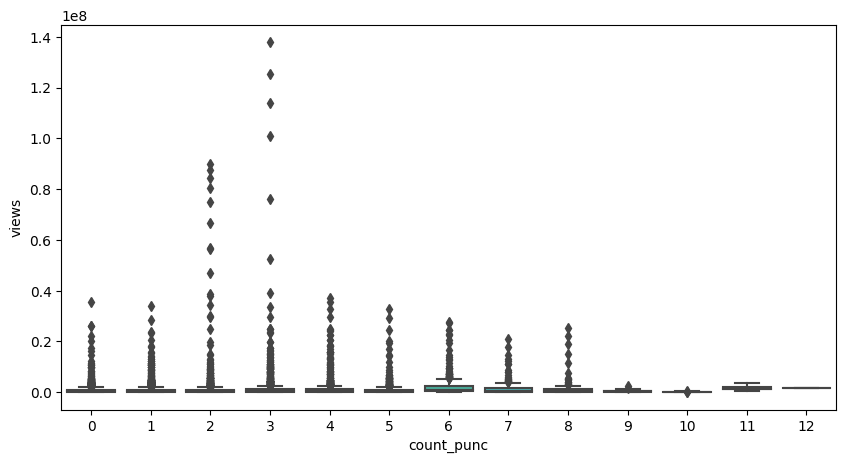

In [88]:
#creating boxplot for views vs count_puc
plt.figure(figsize=(10,5))
sns.boxplot(x='count_punc',y='views',data=sample)

In [87]:
sample['count_punc'].corr(sample['views'])

0.0651000978304486

Above fig represents there is 0.06 correlation between puncuation count and views